In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Placement_Pre-processed_Dataset.csv")

In [3]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [4]:
import seaborn as sns

In [5]:
#!pip install seaborn

C:\Users\swath\AppData\Local\Temp\ipykernel_2156\2590864738.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ssc_p"])


<Axes: xlabel='ssc_p', ylabel='Density'>

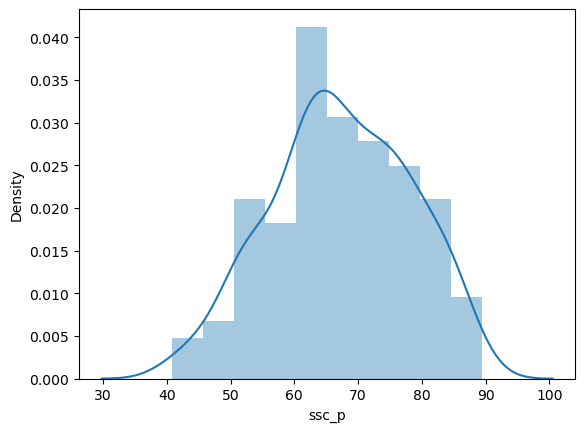

In [6]:
sns.distplot(dataset["ssc_p"])

def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

In [8]:
def get_pdf_probability(dataset, startrange, endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns

    ax = sns.distplot(dataset, kde=True, kde_kws={'color': 'blue'}, color='Green')
    pyplot.axvline(startrange, color='Red')
    pyplot.axvline(endrange, color='Red')
    sample = dataset
    sample_mean = sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    dist = norm(sample_mean, sample_std)
    values = []
    for value in range(startrange, endrange):
        values.append(value)
    probabilities = []
    for value in values:
        probabilities.append(dist.pdf(value))
    prob = sum(probabilities)
    print("The area between range({}, {}): {}".format(startrange, endrange, prob))
    return prob


In [9]:
#values = []
#for value in range(startrange, endrange):
    #values.append(value)


Mean=67.303, Standard Deviation=10.827
The area between range(30, 70): 0.5801740829826278


C:\Users\swath\AppData\Local\Temp\ipykernel_2156\3929360250.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset, kde=True, kde_kws={'color': 'blue'}, color='Green')


0.5801740829826278

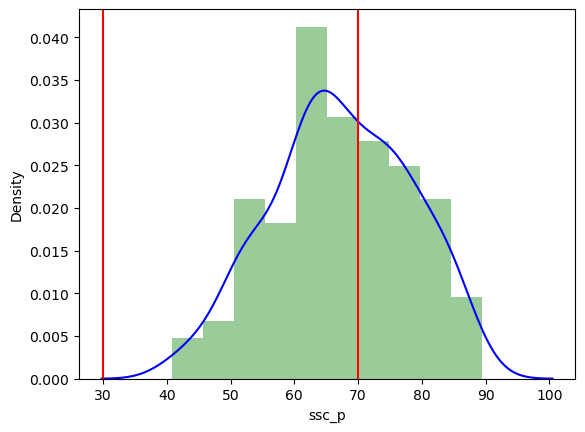

In [25]:
get_pdf_probability(dataset["ssc_p"],30,70)

In [27]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['ssc_p'])
ecdf(80)

0.8651162790697674

In [12]:
#!pip install statsmodels